# Neural Network Framework 
We'll try to build the following ConvNet by the end of this session

![Architecture](https://github.com/IshaanMudgal/IITB-DL-Workshop/blob/master/sess1_res/Model_img_2.JPG?raw=true)

**Components:**
1. Fully Connected / Dense
2. Activation
3. Convolution
4. Pooling

# **Utilities**

---
**Matrix Multiplication**:

    Input - 2 matrices of compatible sizes ('m1', 'm2')

    Output - Sum of elements of matrix obtained by multiplying 'm1', 'm2'
   
**Uploader**:
  To upload files from local machine

In [0]:
import numpy as np
import pickle as pk
from google.colab import files
import cv2

def multiply_matrices(m1, m2):
    if not (m1.shape == m2.shape):
        raise Exception('Matrices are not of the same dimenstion', m1.shape, m2.shape, 'are not compatible')
    prod = m1*m2
    return np.sum(prod)

In [0]:
def uploader():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('user uploaded file {name} with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

# **Fully Connected / Dense Layer**

---
Neurons in a fully connected layer have full connections to all activations in the previous layer.
Their activations can hence be computed with a matrix multiplication followed by a bias offset. 

Input - Input matrix [1 x L] , weights [L x N] , bias [1 x N]

Output - Output of FC Layer [1 x N]


![FC_Layer](https://github.com/IshaanMudgal/IITB-DL-Workshop/blob/master/sess1_res/tfdl_0401.png?raw=true)![equation](https://github.com/IshaanMudgal/IITB-DL-Workshop/blob/master/sess1_res/equation_fc.png?raw=true)



https://www.oreilly.com/library/view/tensorflow-for-deep/9781491980446/assets/tfdl_0401.png

In [0]:
#### Output = W*X + bias ######
def fullyconnected(ip, weights, bias=None):
  if bias is None:
    out = np.dot(ip, weights)
  else:
    out = np.dot(ip, weights) + bias
  return out

# **Activation Layers**

---
An activation fucntion decides whether a nueron should be fired or not.

**ReLU (Rectified Linear Unit)**

ReLU layer will apply an elementwise activation function 'max(0,x)'  i.e. thresholding at zero. This leaves the size of the volume unchanged.

![RELU](https://cdn-images-1.medium.com/max/937/1*oePAhrm74RNnNEolprmTaQ.png)

*Source - https://cdn-images-1.medium.com/max/937/1oePAhrm74RNnNEolprmTaQ.png* 




---
**Softmax Activation**

The softmax function squashes the outputs of each unit to be between 0 and 1 and it also divides each output such that the total sum of the outputs is equal to 1.
The output of the softmax function is equivalent to a categorical probability distribution, it tells you the probability that any of the classes are true.

![Softmax](https://cloud.githubusercontent.com/assets/14886380/22743247/9eb7c856-ee54-11e6-98ca-a7e03120b1f8.png)

*Source - https://cloud.githubusercontent.com/assets/14886380/22743247/9eb7c856-ee54-11e6-98ca-a7e03120b1f8.png* 






In [0]:
class Activation:
    ## act_type: 0 = ReLU
    ##           1 = Softmax
    ##
    ## ip_type: 0 = for ReLU after conv layer
    ## ip_type: 1 = for ReLU after dense layer
    def __init__(self, ip, act_type, ip_type=0):
        self.ip = ip
        self.act_type = act_type
        self.ip_type = ip_type
    
    def relu(self):
      ###### ReLU for Convolution ##########
      if (self.ip_type == 0):
        input = self.ip  
        num_channels, input_size, _ = input.shape
        ### Placeholder for output
        relu_out = np.zeros([num_channels, input_size, input_size])  
        
        for map_id in range(num_channels):  
            for r in np.arange(0, input_size):  
                for c in np.arange(0, input_size):
                  ##### TODO : Fill the placeholder with relu outputs ######
                  ##########################################################
                 
        return relu_out 
      ###### ReLU for Dense layer ##########
      else:
        input = self.ip
        relu_out = np.zeros(input.shape)        
        for r in np.arange(0,input.shape[0]):  
          for c in np.arange(0, input.shape[1]):
            if input[r, c] > 0:
              relu_out[r, c] = input[r, c]
        return relu_out

    def softmax(self):
        inputs = self.ip
        out = np.exp(inputs - np.max(inputs)) 
        return out / np.sum(out)

    def forward_pass(self):
        if (self.act_type == 0):
            return self.relu()
        if (self.act_type == 1):
            return self.softmax()

# **Convolution Layer**


---

Convolution layer will compute the output of neurons that are connected to local regions in the input, each computing a dot product between their weights and a small region they are connected to in the input volume. 


![Convolution](https://media.giphy.com/media/i4NjAwytgIRDW/giphy.gif)![alt text](https://github.com/IshaanMudgal/IITB-DL-Workshop/blob/master/sess1_res/kernel_conv_2.JPG?raw=true)

*Source - https://media.giphy.com/media/i4NjAwytgIRDW/giphy.gif*

*Example:*
![Edge Detection](https://i1.wp.com/timdettmers.com/wp-content/uploads/2015/03/convolution.png)

*Source: https://i1.wp.com/timdettmers.com/wp-content/uploads/2015/03/convolution.png*

# **Zero padding**

---

Sometimes it will be convenient to pad the input volume with zeros around the border. The size of this zero-padding is a hyperparameter. The nice feature of zero padding is that it will allow us to control the spatial size of the output volumes


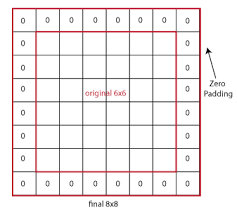

# **Stride**

---

The stride specifies the value with which we slide the filter. When the stride is 1 then we move the filters one pixel at a time. When the stride is 2 (or uncommonly 3 or more, though this is rare in practice) then the filters jump 2 pixels at a time as we slide them around. This will produce smaller output volumes spatially.

**In the gif below, stride is 2**

![alt text](http://deeplearning.net/software/theano/_images/numerical_padding_strides.gif)

*Source - http://deeplearning.net/software/theano/_images/numerical_padding_strides.gif*
#Convolution Output Size
O = ((I - K + 2*P)/S) + 1

In [0]:
class ConvLayer():
    def __init__(self, ip, kernels, stride=1, padding=1):
        self.ip = ip
        self.padding = padding
        self.stride = stride
        self.kernels = kernels
        return
    
    ############## Convolution 3d maps with 3d kernels ################
    def _conv_3d_maps(self, cmap, kernel):
      num_channels, ip_size, ip_size = cmap.shape
      num_kernel_channels, kernel_size, kernel_size = kernel.shape
      if not (num_channels == num_kernel_channels):
        print("Mismatch in number of channels of kernel and input image")
        
      padding_length = self.padding  
      stride = self.stride
      
      ###########################################################################################################
      ############################          Create a new padded input map       #################################
      ###########################################################################################################
      
      padded_size = ip_size + 2*padding_length
      cmap_padded = np.zeros([num_channels, padded_size, padded_size])
      for c in range(num_channels):
        for col in range(padded_size):
            for row in range(padded_size):
                if (row >= ip_size) or (col >= ip_size):
                    break
                ###### TODO : Fill the 'cmap_padded' placeholder to create a padded input map #######
                #####################################################################################
                
      ###########################################################################################################
      ###############      Compute the output map after convolving with the kernel filters    ###################
      ###########################################################################################################

      ##### TODO : Fill in the output size ######
      output_size = ###
      ###########################################
      
      ############# Output Placeholder #############
      output_map_3d = np.zeros([output_size, output_size])
      try:
          cmap_iter_row = kernel_size // 2          
          out_col, out_row = 0, 0
          while (out_row < output_size):
              if (cmap_iter_row + kernel_size//2 + 1 > padded_size):
                break
              out_col = 0
              cmap_iter_col = kernel_size // 2 
              while (out_col < output_size):                  
                  if (cmap_iter_col + kernel_size//2 + 1 > padded_size):
                    break
                  m1 = cmap_padded[:, cmap_iter_row - kernel_size//2:cmap_iter_row + kernel_size//2 + 1, cmap_iter_col - kernel_size//2:cmap_iter_col + kernel_size//2 + 1]
                  output_map_3d[out_row][out_col] = np.sum(multiply_matrices(m1, kernel))
                  cmap_iter_col += stride     
                  out_col += 1
              out_row += 1
              cmap_iter_row += stride

      except Exception as e:
          print(e)
          
      #### Return the convolved output ####
      return output_map_3d

    def forward_pass(self):
        this_input = self.ip
        ip_depth, ip_size, ip_size = this_input.shape
        num_kernels, kernel_depth, kernel_size, kernel_size = self.kernels.shape
        outputs = []
        for kernel_id in range(num_kernels):
          out_map = np.zeros((ip_size, ip_size))
          out_map = self._conv_3d_maps(this_input, self.kernels[kernel_id])
          outputs.append(out_map)
        return np.array(outputs)

# **Flatten Layer**

Output of convolution layers will be a 3-D feature map. 
If a dense/fullyconnected layer follows, then a reshape of the 3-D feature map is required (this operation is called flattening) 

![alt text](https://github.com/IshaanMudgal/IITB-DL-Workshop/blob/master/sess1_res/dDYphPB.png?raw=true)

*Source:https://i1.wp.com/i.imgur.com/dDYphPB.png?zoom=1.25&resize=461%2C380&ssl=1*

In [0]:
## To be used before calling Dense/FC layer so that the 3d input is converted to a 1d vector
def flatten(ip):
  out = None
  C, W, H = ip.shape
  reshaped_input = ip.reshape((1, int(C*W*H)))
  return reshaped_input  

# **Pooling**

Its function is to progressively reduce the spatial size of the representation to reduce the amount of parameters and computation in the network, and hence to also control overfitting. The Pooling Layer operates independently on every depth slice of the input and resizes it spatially, using the MAX operation. The most common form is a pooling layer with filters of size 2x2 applied with a stride of 2 downsamples every depth slice in the input by 2 along both width and height, discarding 75% of the activations.

![alt text](https://www.cntk.ai/jup/c103d_max_pooling.gif)

*Source - https://www.cntk.ai/jup/c103d_max_pooling.gif*

In [0]:
def pooling(ip, pool_size=2, stride=2): 
  num_channels, ip_size, _ = ip.shape
  out_size = (ip_size - pool_size)//stride + 1
  
  ######## Placeholder for Pooled output ########
  pool_out = np.zeros((num_channels, out_size, out_size))
  
  for map_num in range(num_channels):
    output_row = 0
    for row in np.arange(0, ip_size - pool_size + 1, stride):  
      output_col = 0
      for column in np.arange(0, ip_size - pool_size + 1, stride):
        #######  TODO : Find the Max of input section from [row to row + pool_size, column to column + pool_size] #######
        #################################################################################################################
        output_col = output_col + 1
      output_row = output_row + 1
  return pool_out

# **Model Definition**



In [10]:
#### Upload Cifar10 dataset
uploader()
!tar -zxvf cifar10.tar.gz

Saving cifar10 (1).tar.gz to cifar10 (1).tar.gz
user uploaded file cifar10 (1).tar.gz with length 25662 bytes
tar (child): cifar10.tar.gz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now


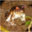

In [19]:
####### Load image for inference ########
from PIL import Image
inputs = Image.open('cifar10_images/image0.png')
########### Display Image #############
inputs

In [27]:
inputs = np.array(inputs)
inputs = inputs.T
inputs.shape

(3, 32, 32)

In [0]:
####### Dictionary to save all intermediate outputs ########
end_points = {} 

####### Number of output classes in dataset ########
NUM_CLASSES = 10

Let's test our implementation with random weights

In [0]:
####### Initialize model weights with random data ######
convlayer1_kernels  = np.random.random((32, 3, 3, 3))
convlayer2_kernels  = np.random.random((64, 32, 3, 3))
convlayer3_kernels  = np.random.random((64, 64, 3, 3))
convlayer4_kernels  = np.random.random((64, 64, 3, 3))
denselayer1_weights = np.random.random((3136, 512))
denselayer2_weights = np.random.random((512, 10))

In [0]:
###########################################################################################################
###############                      Adding layers to model                             ###################
###########################################################################################################


##### ConvLayer1 #####
layer1_stride = 1
layer1_padding = 1
layer1 = ConvLayer(inputs, convlayer1_kernels, layer1_stride, layer1_padding)
layer1_outs = layer1.forward_pass()
end_points['convlayer1'] = layer1_outs

##### Act1 #####
act1_inputs = layer1_outs
act1 = Activation(act1_inputs, 0)
act1_outs = act1.forward_pass()
end_points['act1'] = act1_outs
print("Activation1 output shape:", act1_outs.shape)

In [0]:
##### ConvLayer2 #####
layer2_inputs = act1_outs
layer2_stride = 1
layer2_padding = 0
layer2 = ConvLayer(layer2_inputs, convlayer2_kernels, layer2_stride, layer2_padding)
layer2_out = layer2.forward_pass()
end_points['convlayer2'] = layer2_out

##### Act2 #####
act2_inputs = layer2_out
act2 = Activation(act2_inputs, 0)
act2_outs = act2.forward_pass()
end_points['act2'] = act2_outs
print("Activation2 output shape:", act2_outs.shape)

In [0]:
#### MaxPool #####
pool1_inputs = act2_outs
pool1_outs = pooling(pool1_inputs, pool_size=2, stride=2)
print("Pool1 output shape:", pool1_outs.shape)

In [48]:
##### ConvLayer3 #####
layer3_inputs = pool1_outs

####### TODO : Declare a conv3 layer with parameters as in the above architecture #######
########################################################################################

end_points['convlayer3'] = layer3_out

##### Act3 #####
act3_inputs = layer3_out

###### TODO : Declare activation3 layer #######

end_points['act3'] = act3_outs
print("Activation3 output shape:", act3_outs.shape)

conv3 outputs ready
(64, 15, 15)


In [49]:
##### ConvLayer4 #####
layer4_inputs = act3_outs

####### TODO : Declare conv4 layer with parameters as in the above architecture #######
########################################################################################

end_points['convlayer4'] = layer4_out

##### Act4 #####
act4_inputs = layer4_out

###### TODO : Declare activation4 layer as in architecture #######

end_points['act4'] = act4_outs
print("Activation4 output shape:", act4_outs.shape)

conv4 outputs ready
(64, 15, 15)


In [50]:
#### MaxPool2 #####
pool2_inputs = act4_outs

###### TODO : Declare Max-Pool2 layer #######

print("Pool2 output shape:", pool2_outs.shape)

(64, 7, 7)


In [66]:
##### Flatten #####
flattened_out = flatten(pool2_outs.T)

##### Dense 3 #####
denselayer1_inputs = flattened_out
denselayer1_outs = fullyconnected(denselayer1_inputs, denselayer1_weights)
end_points['FC'] = denselayer1_outs
print("Flatten Output Shape:", denselayer1_inputs.shape)

##### Act5 #####
act5_inputs = denselayer1_outs
act5 = Activation(act5_inputs, 0, 1)
act5_outs = act5.forward_pass()
end_points['act5'] = act5_outs
print("Activation5 output shape:", act5_outs.shape)

Flatten Output Shape: (1, 3136)
Activation5 output shape: (1, 512)


In [67]:
##### Dense 4 #####
denselayer2_inputs = act5_outs

###### TODO : Declare the last Dense layer #######

end_points['FC'] = denselayer2_outs
print(denselayer2_outs.shape)

(1, 10)


In [69]:
##### Final Activation #####
finalact_inputs = denselayer2_outs
finalact = Activation(finalact_inputs, 1)
finalact_outs = finalact.forward_pass()
end_points['finalact'] = finalact_outs

print("Final Probabilities:", end_points['finalact'])


Final Probabilities: [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [70]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
index = np.argmax(finalact_outs)
predicted_class = class_names[index]
print("Predicted Class:", predicted_class)

Predicted Class: frog


# Load Pre Trained Model Weights

Load pre trained model weights, trained on CIFAR 10 dataset

In [0]:
def loader(input_weights_file):
  weights = pk.load(open(input_weights_file, 'rb'))
  n_weights = {}
  for layer_name in weights:
    w = weights[layer_name]
    if not (len(w) == 0):
      if 'conv' in layer_name:
        n_weights[layer_name] = np.array(w[0]).T
      if 'dense' in layer_name:
        n_weights[layer_name] = w[0]
  return n_weights

In [0]:
uploader()

In [38]:
filename = 'CIFAR_weights_rolled'
m_weights = loader(filename)

### Load pre trained weights for the network ###
convlayer1_kernels = m_weights['conv2d_1']
convlayer2_kernels = m_weights['conv2d_2']
convlayer3_kernels = m_weights['conv2d_3']
convlayer4_kernels = m_weights['conv2d_4']
denselayer1_weights = np.array(m_weights['dense_1'])
denselayer2_weights = np.array(m_weights['dense_2'])

print(convlayer1_kernels.shape)

(32, 3, 3, 3)


**References**:

[1] http://cs231n.github.io/ 

[2] http://timdettmers.com/2015/03/26/convolution-deep-learning/

[3] https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0